# Grid World

In [10]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.table import Table

## The World

<img src="gridworld.png" alt="gridworld" width=600 height=400>
 
In this game, the agent lives on a 5x5 grid. The agent starts at a random position can move in one of four directions (up, down, left, right). Any action from A leads to A' and yields a reward of +10. Similarly, any action from B leads to B' and a reward of +5. Any action that takes the agent off the grid receives a reward of -1 without changing the location of the agent. All other actions have a reward of 0. 
  
In the code below we wil define the world. We start by definind the world size, the position of A and A', B and B',the discount factor is $\gamma=0.9$, and the actions the agent can take. We also define the probability of taking an action as 0.25.

In [2]:
WORLD_SIZE = 5
A_POS = [0, 1]
A_PRIME_POS = [4, 1]
B_POS = [0, 3]
B_PRIME_POS = [2, 3]
DISCOUNT = 0.9

ACTIONS = [np.array([0, -1]), # left
           np.array([-1, 0]), # up
           np.array([0, 1]),  # right
           np.array([1, 0])]  # down

ACTIONS_FIGS=[ '←', '↑', '→', '↓']


ACTION_PROB = 0.25

### Step Function 
 Next we define the step function. This function receives the current state and the action the agent wants to take. If the agent is in A or B, the function returns the position of A' or B' and the reward. If the agent is at the border of the grid, the function returns the same state and a reward of -1. If the agent is in any other position, the function returns the next state and a reward of 0.

In [3]:
def step(state, action):
    if state == A_POS:
        return A_PRIME_POS, 10
    if state == B_POS:
        return B_PRIME_POS, 5

    next_state = (np.array(state) + action).tolist()
    x, y = next_state
    if x < 0 or x >= WORLD_SIZE or y < 0 or y >= WORLD_SIZE:
        reward = -1.0
        next_state = state
    else:
        reward = 0
    return next_state, reward


In [4]:
def draw_image(image, ax):
    """
    Draw the  world
    :param image: 
    :param ax: 
    :return: 
    """    
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = image.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(image):

        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                    loc='center', facecolor='white')
        

    # Row and column labels...
    for i in range(len(image)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                    edgecolor='none', facecolor='none')

    ax.add_table(tb)

def draw_policy(optimal_values, ax):
    """
    Draw the policy
    :param optimal_values:
    :param ax:
    """        
    ax.set_axis_off()
    tb = Table(ax, bbox=[0, 0, 1, 1])

    nrows, ncols = optimal_values.shape
    width, height = 1.0 / ncols, 1.0 / nrows

    # Add cells
    for (i, j), val in np.ndenumerate(optimal_values):
        next_vals=[]
        for action in ACTIONS:
            next_state, _ = step([i, j], action)
            next_vals.append(optimal_values[next_state[0],next_state[1]])

        best_actions=np.where(next_vals == np.max(next_vals))[0]
        val=''
        for ba in best_actions:
            val+=ACTIONS_FIGS[ba]
        
        # add state labels
        if [i, j] == A_POS:
            val = str(val) + " (A)"
        if [i, j] == A_PRIME_POS:
            val = str(val) + " (A')"
        if [i, j] == B_POS:
            val = str(val) + " (B)"
        if [i, j] == B_PRIME_POS:
            val = str(val) + " (B')"
        
        tb.add_cell(i, j, width, height, text=val,
                loc='center', facecolor='white')

    # Row and column labels...
    for i in range(len(optimal_values)):
        tb.add_cell(i, -1, width, height, text=i+1, loc='right',
                    edgecolor='none', facecolor='none')
        tb.add_cell(-1, i, width, height/2, text=i+1, loc='center',
                   edgecolor='none', facecolor='none')

    ax.add_table(tb)

### Iterative Policy Evaluation

Here we implement the iterative policy evaluation algorithm. This algorithm calculates the value function for a given policy, in this case it's an **equiprobable policy**, that is, with the same probability for each action. The value function is the expected return when starting in a given state and following the policy. The algorithm iterates until the value function converges. We start with a value function of zeros and update the value function using the Bellman equation. 

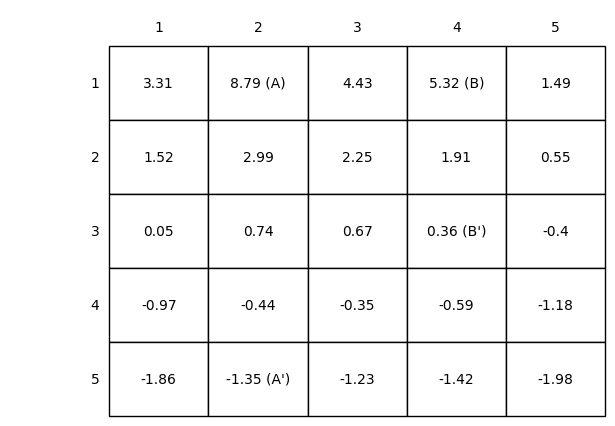

In [5]:
def figure_3_2():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # bellman equation
                    new_value[i, j] += ACTION_PROB * (reward + DISCOUNT * value[next_i, next_j])
        if np.sum(np.abs(value - new_value)) < 1e-4:
            fix, ax = plt.subplots()
            draw_image(np.round(new_value, decimals=2), ax=ax)
            plt.show()
            break
        value = new_value

figure_3_2()

### Solving the Linear System
We can also find the exact solution to the Bellman equation by solving a linear system of equations. We can write the Bellman equation for each state as a linear equation. We can then solve the system of equations to find the value function.

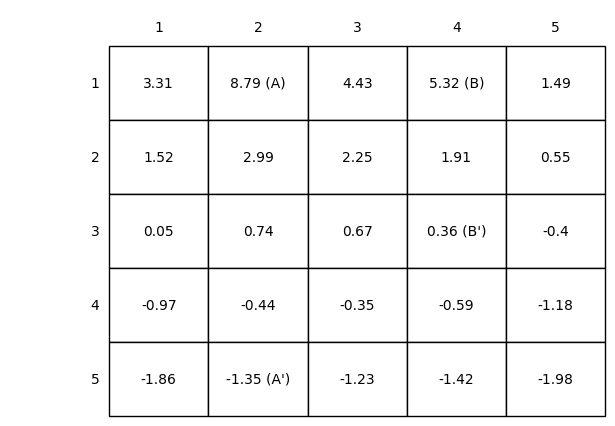

In [6]:
def figure_3_2_linear_system():
    '''
    Here we solve the linear system of equations to find the exact solution.
    We do this by filling the coefficients for each of the states with their respective right side constant.
    '''
    A = -1 * np.eye(WORLD_SIZE * WORLD_SIZE)
    b = np.zeros(WORLD_SIZE * WORLD_SIZE)
    for i in range(WORLD_SIZE):
        for j in range(WORLD_SIZE):
            s = [i, j]  # current state
            index_s = np.ravel_multi_index(s, (WORLD_SIZE, WORLD_SIZE))
            for a in ACTIONS:
                s_, r = step(s, a)
                index_s_ = np.ravel_multi_index(s_, (WORLD_SIZE, WORLD_SIZE))

                A[index_s, index_s_] += ACTION_PROB * DISCOUNT
                b[index_s] -= ACTION_PROB * r

    x = np.linalg.solve(A, b)
    fix, ax = plt.subplots()
    draw_image(np.round(x.reshape(WORLD_SIZE, WORLD_SIZE), decimals=2), ax=ax)
    plt.show()

figure_3_2_linear_system()

### Optimal Value Function
Now we will calculate the optimal value function, that is the optimal policy. We will use the value iteration algorithm to find the optimal value function. The value iteration algorithm updates the value function by selecting the action that maximizes the expected return. The algorithm iterates until the value function converges.

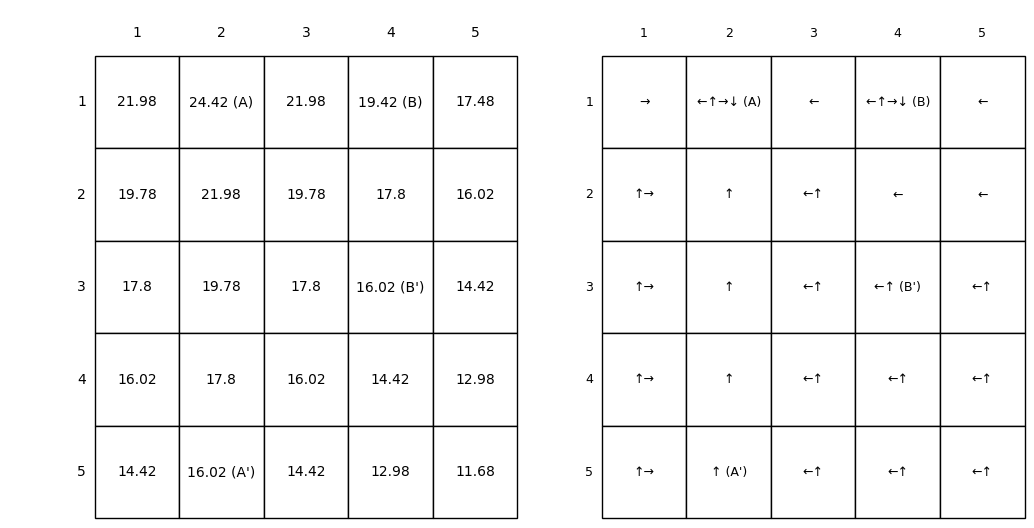

In [8]:
def figure_3_5():
    value = np.zeros((WORLD_SIZE, WORLD_SIZE))
    while True:
        # keep iteration until convergence
        new_value = np.zeros_like(value)
        for i in range(WORLD_SIZE):
            for j in range(WORLD_SIZE):
                values = []
                for action in ACTIONS:
                    (next_i, next_j), reward = step([i, j], action)
                    # value iteration
                    values.append(reward + DISCOUNT * value[next_i, next_j])
                new_value[i, j] = np.max(values) # note the maximization
        if np.sum(np.abs(new_value - value)) < 1e-4:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
            draw_image(np.round(new_value, decimals=2), ax=ax1)
            draw_policy(new_value, ax=ax2)
            break
        value = new_value

figure_3_5()